# ARE 258 Replication Workshop 1 (student copy)
## Article: Modelling the Pattern of Structural Change in U.S. Meat Demand
### Authors: Giancarlo Moschini and Karl D. Meilke

### Replication team: Team 4
### Name: Valentina, Pin-Ling, Adreanna
### Date: 04/13/2022

-------

# About this notebook
- The section titles starting with **D..** are the ones where we do some hands-on coding. These titles are in black.
- The section titles starting with **Q..** Contain the write-up questions. These sections are in <span style="color:green">green</span> 
- Titles in <span style="color:blue">blue</span> are notes to guide you

- IMPORTANT: This workshop is a graded assignment and your submission will be graded based on:
    - completeness of your code
    - quality of your answer to the questions (the sections with green titles)

# <span style="color:blue">A quick overview of the article</span>

**Background and Motivation:** Consumption patterns for meat products have changed considerably over the last few decades. In particular, consumption of chicken has significantly increased while beef consumption saw a sharp decline. Several hypotheses have been offered to explain this phenomenon. These include (1) productivity gains in poultry that reduced prices of poultry (2) changes in structure of meat demand due to changes in income distribution, demography, and consumer preferences. Past studies have found mixed results regarding the existence of structural change in meat demand, mainly because empirically testing for changes in preferences is difficult since it depends on assumptions made about the form of the underlying utility functions and the models suffer from the problems associated with aggregation across consumers or commodities.  Unlike previous studies, the authors use a model which provides first order approximation to an arbitrary demand system that satisfies perfect aggregation over consumers. 


**Objective of the study:**  To empirically test for the existence of a structural change in the demand for meat in the US and analyse the nature of the structural change.

**Why:** The authors are concerned that if previous studies have systematically underestimated the role of structural change, estimates of demand elasticities may be biased, leading to incorrect market analysis. 

**Structural change:** Refers to a change in the parameters in the system of demand equations.  These changes may be caused by changes in demography, preferences, etc.  The authors ask if a structural change indeed occurred in the US demand for meat, and if these change were abrupt or gradual.

**Model and Method:** The authors use a stochastic and linear version of the AIDS model, which is developed by Deaton and Muellbauer (1980). In addition, they adopt a gradual switching regression framework that provides information on the time path of this change and investigates the bias of structural change on consumption pattern and estimated elasticities. The demand system is estimated using seemingly unrelated regression procedure.

**Data:** Demand for four meats (beef and veal, pork, chicken, and fish) given by quarterly disappearances1 and retail quarterly data over the period 1967-I to 1987-IV (actually 1988 in our dataset).

**Hypothesis:** Ho: model parameters do not change over time (aka no structural change). Rejecting the null suggests that parameters change over time and therefore provides evidence of structural change. The authors reject the null of structural change when comparing full model before and after. Yet, they fail to reject that Marshallian elasticities are statistically different in both periods. 

**Key Assumptions:**  The following important assumptions are made in the study (1) there exist weak separability between these products and all other goods (2) there is common time path for all parameters (aka structural change affects all equations simultaneously)

# D1: Importing and setting up the  data, then replicating figure 1
Note place your data in the same folder as your notebook to avoid wasting time on directory setup.

In [104]:
clear all
set more off
ssc install blindschemes
set scheme plotplain
import delimited moschini_data.csv, encoding(ISO-8859-1)




checking blindschemes consistency and verifying not already installed...
all files already exist and are up to date.


(13 vars, 88 obs)


In [3]:
//%browse

## Create labels

In [105]:
label var q1 "beef"
label var q2 "pork"
label var q3 "chicken"
label var q4 "fish" 

label var p1 "beef price"
label var p2 "pork price"
label var p3 "chicken price"
label var p4 "fish price"

## Create time series variable for plots

In [106]:
cap gen yr_qtr = yq(yr,qtr) /*what has this done*/
format yr_qtr %tq

In [68]:
%head 5

,yr,qtr,period,h,q1,q2,q3,q4,p1,p2,p3,p4,h1,yr_qtr
1,1967,1,1,0,18.9,13,8.1599998,2.734,.82700002,.792,.41800001,.93000001,0,1967q1
2,1967,2,2,0,19.1,13,9.0299997,2.6949999,.83399999,.72399998,.42399999,.96399999,.0099999998,1967q2
3,1967,3,3,0,20.1,12.9,9.5,2.6600001,.81800002,.74800003,.421,.98100001,.02,1967q3
4,1967,4,4,0,19.6,15.4,8.8999996,2.5769999,.81699997,.69800001,.38600001,.99400002,.029999999,1967q4
5,1968,1,5,0,19.700001,15.5,8.6800003,2.5239999,.80699998,.66100001,.38100001,1.007,.050000001,1968q1


## Set time series variable

In [107]:
tsset yr_qtr, quarterly 


Time variable: yr_qtr, 1967q1 to 1988q4
        Delta: 1 quarter


## Replicate the graph in Figure 1
- do you see a difference?

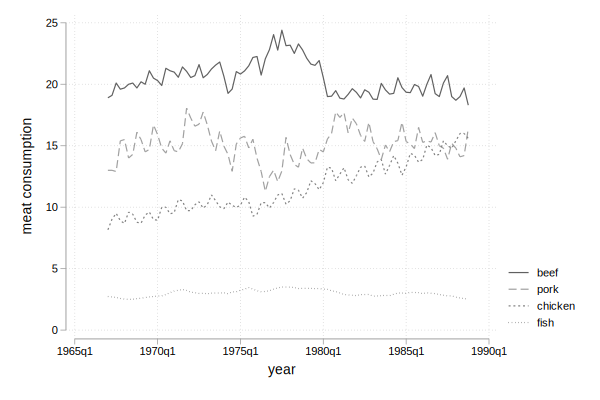

In [143]:
graph twoway tsline q1 q2 q3 q4, xtitle(year) ytitle(meat consumption)
//Difference: fish line sits far below compared to original figure, although it follows the exact same pattern.

# <span style="color:green">Q1. What variables do you have?</span>

- Different meat products: beef, pork, chicken, and fish (which is later dropped).
- Prices prices of each meat type  
- Seasonal dummies
- Total expenditure
- Budget share

# <span style="color:green">Q2. What are the variables used by Moschini and Meilke (1989)?</span>

- Indexed good types (i,j)=1,...,4
- Indexed time t=1,...,T
- Normalized prices log prices
- Normalized budget share  
- 3 seasonal dummies
- Quantities of pork and beef are per capita disappearances in retail weight 
- Quantities of chicken are the total of young and mature chickens disappeared per capita

# D2: Generating the variables     
- Clearly M&M performed several manipulations of the data to get it to fit the AIDS model. You’ll need to perform the same manipulations. Use command “gen” to generate the variables you need to use in the AIDS model.

## Create seasonal dummies
- Create a dummy variable for "quarter" $\left(D_{t}\right)$. You only need to create three dummy variables here. Why is that?
    - --> **We only make dummies for the first three quarters in order to avoid perfect collinearity.**
- there are many ways to do this. here's one `gen dq1=(qtr==1)`


In [144]:
forvalues i=1/4{
    cap gen dq`i'=(qtr==`i')
}

## Calculate total expenditure for each period
- To get budget share you first need to calculate total expenditure for each period. Do this. Call your new variable "bigx".

In [109]:
cap gen bigx=p1*q1+p2*q2+p3*q3+p4*q4

## Calculate budget shares
- Generate your budget shares $\left(w_{i t}\right)$. Look in the right hand column of page 254 if you need guidance. Call them "w1", etc.  

In [110]:
forvalues i=1/4{
    cap gen  w`i'= p`i'*q`i'/bigx
}

## Calculate logs of normalized prices (price divided by its mean)
- Create logs of normalized prices $\left(p_{j t}\right)$. By normalizing, it means to divide prices by their sample means before taking logs, as described by M\&M in the data section of their paper. You need to use the command "egen" to generate the sample mean. Call your sample means "mpl", etc. Call the log of normalized prices "In_npl", etc.

In [111]:
forvalues i=1/4{
    egen mpl`i' = mean(p`i')
    gen ln_npl`i' = log(p`i'/mpl`i')
}

## Calculate the stone price index
- Create the Stone price index, described in the bottom right hand corner of page 254.  Call this “stonegeom”.

You need to construct this:
$$
\ln \left(\boldsymbol{P}^{*}\right)=\sum_{i} w_{i} p_{i}
$$

where $p$ are already in $log()$.

In [112]:
gen stonegeom=(ln_npl1*w1)+(ln_npl2*w2)+(ln_npl3*w3)+(ln_npl4*w4)

## Calculate the normalized expenditure (note that stonegeom is already logged, pg 254)
- Create the normalized expenditure variable, $x_{t}$, using the Stone index. Call it "smallx". Remember to divide total expenditure, X, by its sample mean before taking logs, as described by M\&M in the data section of their pape

In [113]:
egen mbigx = mean(bigx)
gen smallx= log(bigx/mbigx)-stonegeom

# <span style="color:blue">About the structural change</span> 

To allow for structural change we transform (1) into (3) with the additional restrictions given by (4):

$$
(1) \quad w_{i t}=\alpha_{i}+\sum_{j} \beta_{i j} p_{j t}+\beta_{i} x_{t}+\Sigma_{k} \alpha_{i k} D_{k}+e_{i t},
$$


$$
(3)\quad w_{i t}=\alpha_{i}+\gamma_{i} h_{t}+\Sigma_{j}\left(\beta_{i j}+\delta_{i j} h_{t}\right) p_{j t} +\left(\beta_{i}+\delta_{i} h_{t}\right) x_{t}+\Sigma_{k}\left(\alpha_{i k}+\gamma_{i k} h_{t}\right) D_{k}+e_{i t}
$$

and 
 
(4.1) $\sum_{j} \delta_{i j}=0$;

(4.2) $\Sigma_{i} \gamma_{i}=0, \quad \Sigma_{i} \delta_{i j}=0, \quad \Sigma_{i} \delta_{i}=0$,

(4.3) $\quad \delta_{i j}=\delta_{j i}$.

# <span style="color:green">Q3.	What do the restrictions in (4) mean?</span>

- 4.1 satisfies the zero homogeneity condition and illustrates how parameters for good j, holding good i constant do not change
- 4.2 satisfies the adding-up condition. The adding up condition illustrates that the individual expenditure for different good types equals total expenditure per period. Fixed effect are seen in $\Sigma_{i} \gamma_{i}=0\ and \quad \Sigma_{i} \delta_{i}=0$ not changing over time. $\quad \Sigma_{i} \delta_{i}=0$ illustrates the parameters of intersectioned good types not changing over time either.
- 4.3 satisfies the Slutsky Symmetry Condition. Stemming from Roy’s Identity,the order of partial derivatives does not matter, and because the adding-up condition holds, the Slutsky Symmetry condition will always imply the homogeneity condition.

# <span style="color:blue">The switching regimes</span>


With the set of equations (5), equation (3) becomes a gradual switching regression model where $\tau_{1}$ is the end point of the first regime and $\tau_{2}$ is the starting point of the second regime and there is a transition path between the two that is linear.

$(5.1) \quad h_{t}=0 \quad \text { for } t=1, \ldots, \tau_{1}$

$(5.2) \quad h_{t}=\left(t-\tau_{1}\right) /\left(\tau_{2}-\tau_{1}\right)$ for $t=\tau_{1}+1, \ldots, \tau_{2}-1$

(5.3)  $\quad h_{t}=1$ for $t=\tau_{2}, \ldots, T$.

# <span style="color:green">Q4. What is $h_{t}$ conceptually? How do M\&M estimate $h_{t}$. How are $\tau_{1}$ and $\tau_{2}$ computed? </span>

- h(t) is the time path for the demand for meat types. We can estimate the shape of h(t) and estimate where the structural break in demand takes place.
- M&M estimate h(t) by approximating a vector for 0 in the first half and 1 in the latter half. M&M estimated the system of equations from 1967-1983 and from 1971-1987. They include all other parameters in the system along with $\tau_{1}$ and $\tau_{2}$, estimate the coefficients wrt ($\tau_{1}$, $\tau_{2}$), and observe which values during maximize likelihood estimation during specific years. 

# <span style="color:blue">Estimating vs using the already estimated $h_t$</span>

Instead of estimating $h_{t}$ like M\&M we are going to use the values they found. They are already in the data, but we need to interact them with the right hand side variables of interest.


# D3: Create interaction terms              
- To create equation (3) from the left hand side column of page 255 we need to create interactions terms for the right hand side variables $p_{t}, x_{t}$, and $D_{t}$. Call them "h"varname.
- recall, equation $ (3)\quad w_{i t}=\alpha_{i}+\gamma_{i} h_{t}+\Sigma_{j}\left(\beta_{i j}+\delta_{i j} h_{t}\right) p_{j t} +\left(\beta_{i}+\delta_{i} h_{t}\right) x_{t}+\Sigma_{k}\left(\alpha_{i k}+\gamma_{i k} h_{t}\right) D_{k}+e_{i t}$
- here's an example `gen hln_np1=h*ln_np1`...
    - feel free to use loops


In [114]:
forvalues i=1/4{
    cap gen hln_npl`i'=  h*ln_npl`i'
}
cap gen hsmallx= h*smallx
forvalues i=1/3{
    cap gen hdq`i'= h*dq`i'
}

In [78]:
%head

,yr,qtr,period,h,q1,q2,q3,q4,p1,p2,p3,p4,h1,yr_qtr,dq1,dq2,dq3,dq4,bigx,w1,w2,w3,w4,mpl1,ln_npl1,mpl2,ln_npl2,mpl3,ln_npl3,mpl4,ln_npl4,stonegeom,mbigx,smallx,hln_npl1,hln_npl2,hln_npl3,hln_npl4,hsmallx,hdq1,hdq2,hdq3
1,1967,1,1,0,18.9,13,8.1599998,2.734,.82700002,.792,.41800001,.93000001,0,1967q1,1,0,0,0,31.879801,.49028853,.32296312,.10699189,.079756461,1.6692954,-.70235223,1.2469205,-.45387077,.60340911,-.36711398,2.5301023,-1.0008304,-.61003965,67.345093,-.13781779,0,0,0,0,0,0,0,0
2,1967,2,2,0,19.1,13,9.0299997,2.6949999,.83399999,.72399998,.42399999,.96399999,.0099999998,1967q2,0,1,0,0,31.768099,.50142753,.29627204,.1205209,.081779517,1.6692954,-.69392353,1.2469205,-.54364079,.60340911,-.35286197,2.5301023,-.96492374,-.63045615,67.345093,-.12091129,0,0,0,0,0,0,0,0
3,1967,3,3,0,20.1,12.9,9.5,2.6600001,.81800002,.74800003,.421,.98100001,.02,1967q3,0,0,1,0,32.699963,.50280792,.2950829,.12230901,.079800092,1.6692954,-.71329457,1.2469205,-.51102912,.60340911,-.35996258,2.5301023,-.94744253,-.62907875,67.345093,-.093377359,0,0,0,0,0,0,0,0
4,1967,4,4,0,19.6,15.4,8.8999996,2.5769999,.81699997,.69800001,.38600001,.99400002,.029999999,1967q4,0,0,0,1,32.759338,.48881328,.32812628,.10486781,.078192607,1.6692954,-.71451783,1.2469205,-.58021307,.60340911,-.44675803,2.5301023,-.93427777,-.65955311,67.345093,-.061088864,0,0,0,0,0,0,0,0
5,1968,1,5,0,19.700001,15.5,8.6800003,2.5239999,.80699998,.66100001,.38100001,1.007,.050000001,1968q1,1,0,0,0,31.992149,.49693128,.32025045,.10337162,.079446614,1.6692954,-.72683328,1.2469205,-.6346783,.60340911,-.45979601,2.5301023,-.92128414,-.68516499,67.345093,-.059174512,0,0,0,0,0,0,0,0
6,1968,2,6,0,20,14,9.6000004,2.5009999,.80599999,.66399997,.38100001,1.002,.059999999,1968q2,0,1,0,0,31.579601,.51045609,.29436722,.11582161,.079355083,1.6692954,-.72807318,1.2469205,-.63015008,.60340911,-.45979601,2.5301023,-.92626172,-.6839028,67.345093,-.073415853,0,0,0,0,0,0,0,0
7,1968,3,7,0,20.1,14.3,9.4300003,2.5120001,.84299999,.70200002,.38800001,.99599999,.07,1968q3,0,0,1,0,33.143692,.51123756,.30288118,.11039326,.075488031,1.6692954,-.68318999,1.2469205,-.57449871,.60340911,-.44159007,2.5301023,-.93226773,-.64240086,67.345093,-.066576764,0,0,0,0,0,0,0,0
8,1968,4,8,0,19.700001,16.1,8.7700005,2.5599999,.85000002,.66000003,.37200001,.99599999,.079999998,1968q4,0,0,0,1,33.183201,.50462282,.32022229,.098316021,.076838881,1.6692954,-.67492056,1.2469205,-.63619226,.60340911,-.48370156,2.5301023,-.93226773,-.66349328,67.345093,-.044293012,0,0,0,0,0,0,0,0
9,1969,1,9,0,20.200001,15.5,8.6999998,2.5929999,.85000002,.66399997,.39199999,1.0039999,.090000004,1969q1,1,0,0,0,33.475773,.51290828,.30744621,.10187665,.077768832,1.6692954,-.67492056,1.2469205,-.63015008,.60340911,-.4313336,2.5301023,-.92426777,-.65573162,67.345093,-.04327644,0,0,0,0,0,0,0,0
10,1969,2,10,0,20,14.5,9.3599997,2.6530001,.85699999,.66900003,.40099999,1.0089999,.1,1969q2,0,1,0,0,33.270737,.51516742,.29156253,.11281265,.080457397,1.6692954,-.66671902,1.2469205,-.62264806,.60340911,-.40863401,2.5301023,-.91930002,-.64507633,67.345093,-.060075473,0,0,0,0,0,0,0,0


# <span style="color:blue">About the error terms </span>
- We’re almost ready to estimate a model, but first we need to think about the error terms.  Look at the assumptions about the error structure in the right hand side column of page 255 (7.1-7.3).


# <span style="color:green">Q5.	What do we assume about the error terms?</span>

- **Within the same equation and the same time period?**
    - *they have an expected value of zero:* $ E(u_{it}) = 0$
- **Within different equations and the same time periods?**
    - *they are contemporaneously correlated between different equations:* $ E(u_{it} u_{jt}) = \omega_{ij} $
- **In different equations and different time periods?**
    - *they have an expected value of zero:* $ E(u_{it} u_{js}) = 0$




# <span style="color:green">Q6.	Why do M\&M use first differences when estimating their model?</span>

It allows them to get rid of time-invariant variables, and therefore having to estimate fewer parameters. Also, it allows them to have a more direct interpretation of the dynamic behavior in the data.


# D4: Preparing to estimating the first-difference model 
- You need to estimate the system of equations that look like equation 6 (below)
$$
\begin{aligned}
\Delta w_{i t}=& \gamma_{i} \Delta h_{t}+\sum_{j}\left[\beta_{i j} \Delta p_{j t}+\delta_{i j} \Delta\left(h_{t} p_{j t}\right)\right] \\
&+\beta_{i} \Delta x_{t}+\delta_{i} \Delta\left(h_{t} x_{t}\right) \\
&+\sum_{k}\left[\alpha_{i k} \Delta D_{k}+\gamma_{i k} \Delta\left(h_{t} D_{k}\right)\right]+u_{i t}
\end{aligned}
$$


## First, create the first-differenced variables
- Take first differences of all the right hand side variables and the left hand side variables. You will need to use `varname[_n-1]` to refer to the one period lag of observation. 
- you can also use `l.varname` for lags
- also check out the stata difference operator

In [115]:
forvalues i=1/4{
   cap gen d_w`i'= w`i'-w`i'[_n-1]
   cap gen d_ln_npl`i'= ln_npl`i'-ln_npl`i'[_n-1]
   cap gen d_hln_npl`i'= hln_npl`i'-hln_npl`i'[_n-1]
}
forvalues i=1/3{
   cap gen d_dq`i'=dq`i'-dq`i'[_n-1]
   cap gen d_hdq`i'=hdq`i'-hdq`i'[_n-1]
}
cap gen d_h= h-h[_n-1]
cap gen d_smallx=smallx-smallx[_n-1]
cap gen d_hsmallx`i'=hsmallx`i'-hsmallx`i'[_n-1]


# <span style="color:blue">OLS vs SUR </span>

The system of equations can be estimated equation-by-equation usingOLS. The OLS estimates are consistent, but generally not as efficient as the SUR estimates. In a nutshell, SUR is like FGLS  with a specific form of the variance-covariance matrix. 
SUR and OLS are equivalent if:
1. the error terms in each equation are uncorrelated
2. each equation contains exactly the same set of regressors  

# D5: Estimating the first difference model using OLS
- Run each of the four equations separately using OLS.
    - How can we think about the coefficient on ‘d_h’?
- hint: some of your regressors are  `d_h d_ln_np1 d_ln_np2 d_ln_np3 ...` 
- IMPORTANT: pay attention to the approach below. we don't want huge regression results. we need clean tables. 

In [25]:
ssc install estout

checking estout consistency and verifying not already installed...
installing into /home/jupyter-lily0418/ado/plus/...
installation complete.


In [116]:
global rhs d_h d_ln_npl1 d_ln_npl2 d_ln_npl3 d_ln_npl4 d_hln_npl1 d_hln_npl2 d_hln_npl3 d_hln_npl4 d_smallx d_hsmallx d_dq1 d_dq2 d_dq3 d_hdq1 d_hdq2 d_hdq3
forvalues i = 1(1)4 {
    eststo ols`i': qui reg d_w`i' $rhs
    }
estout, label





------------------------------------------------------------------------
                             ols1         ols2         ols3         ols4
                                b            b            b            b
------------------------------------------------------------------------
d_h                      .0139251    -.0155458     .0130046     -.011384
d_ln_npl1                 .083561     .0068376    -.0442775    -.0461205
d_ln_npl2                .0175253     .0141119    -.0161267    -.0155107
d_ln_npl3                -.049213    -.0290388      .087033    -.0087815
d_ln_npl4               -.0859731     .0465204    -.0167251     .0561776
d_hln_npl1               .0191971      -.01178     .0054563     -.012874
d_hln_npl2              -.0018766     .0217441    -.0062126    -.0136547
d_hln_npl3               .0270595    -.0313144     .0019503     .0023048
d_hln_npl4              -.0168714     .0049655     .0362101    -.0243044
d_smallx                 .1622997     -.067809 

In [117]:
esttab, se title("OLS Estimates for the Time-Varying AIDS model")
estimates store ols 
eststo clear



OLS Estimates for the Time-Varying AIDS model
----------------------------------------------------------------------------
                      (1)             (2)             (3)             (4)   
                     d_w1            d_w2            d_w3            d_w4   
----------------------------------------------------------------------------
d_h                0.0139         -0.0155          0.0130         -0.0114   
                 (0.0212)        (0.0189)       (0.00761)       (0.00763)   

d_ln_npl1          0.0836*        0.00684         -0.0443***      -0.0461***
                 (0.0356)        (0.0317)        (0.0128)        (0.0128)   

d_ln_npl2          0.0175          0.0141         -0.0161         -0.0155   
                 (0.0298)        (0.0265)        (0.0107)        (0.0107)   

d_ln_npl3         -0.0492*        -0.0290          0.0870***     -0.00878   
                 (0.0217)        (0.0194)       (0.00780)       (0.00782)   

d_ln_npl4         -0.086

# D6: Estimating the first difference model using SUR
-  Use command `sureg(eq1: varname varname) (eq2: varname varname)` etc.  


## Unrestricted SUR

In [118]:
qui sureg (eq1:d_w1 $rhs)(eq2:d_w2 $rhs) (eq3:d_w3 $rhs)


In [119]:
esttab, unstack se title("SUR Estimates for the Time-Varying AIDS model (unrestricted)")


SUR Estimates for the Time-Varying AIDS model (unrestricted)
------------------------------------------------------------
                      (1)                                   
                     d_w1                                   
                      eq1             eq2             eq3   
------------------------------------------------------------
d_h                0.0139         -0.0155          0.0130   
                 (0.0189)        (0.0168)       (0.00678)   

d_ln_npl1          0.0836**       0.00684         -0.0443***
                 (0.0317)        (0.0282)        (0.0114)   

d_ln_npl2          0.0175          0.0141         -0.0161   
                 (0.0265)        (0.0236)       (0.00951)   

d_ln_npl3         -0.0492*        -0.0290          0.0870***
                 (0.0193)        (0.0173)       (0.00695)   

d_ln_npl4         -0.0860          0.0465         -0.0167   
                 (0.0599)        (0.0534)        (0.0215)   

d_hln_npl1        

### Store estimated values for testing later on

In [120]:
estimates store usur1 

### Store the log likelihood  for a LR test later on

In [121]:
*ereturn list
scalar ll_h= e(ll)

## Restricted SUR
- First, use command `constraint define 1 [eq1]vaname+[eq2]varname=0` etc. Then use command `sureg(eq1: varname varname) (equ2: varname varname), constrain(1, 2, 3)` etc. 
- The equations reduce to three, and the constraints also reduce 
- You only need to put in the symmetry equations (see footnote 1, p. 255): 
    - *Because the adding-up conditions (2.2) will be satisfied by definition by the estimating model, the symmetry constraints (2.3) will always imply the remaining homogeneity restrictions (2.1).*


### First, define the constraints (restrictions)
- example: `constraint define 1 [eq1]d_ln_np2=[eq2]d_ln_np1 /*beta_12 = beta_21*/
`

In [122]:
constraint define 1 [eq1]d_ln_npl2=[eq2]d_ln_npl1
constraint define 2 [eq1]d_ln_npl3=[eq3]d_ln_npl1
constraint define 3 [eq2]d_ln_npl3=[eq3]d_ln_npl2
constraint define 4 [eq1]d_hln_npl2=[eq2]d_hln_npl1
constraint define 5 [eq1]d_hln_npl3=[eq3]d_hln_npl1
constraint define 6 [eq2]d_hln_npl3=[eq3]d_hln_npl2

### Then run the SUR model by imposing the constraints

In [123]:
qui sureg (eq1:d_w1 $rhs)(eq2:d_w2 $rhs) (eq3:d_w3 $rhs),  constraint(1 2 3 4 5 6) isure

In [124]:
esttab, unstack se title("SUR Estimates for the Time-Varying AIDS model (restricted)")


SUR Estimates for the Time-Varying AIDS model (restricted)
------------------------------------------------------------
                      (1)                                   
                     d_w1                                   
                      eq1             eq2             eq3   
------------------------------------------------------------
d_h                0.0150         -0.0140          0.0124   
                 (0.0182)        (0.0167)       (0.00669)   

d_ln_npl1          0.0810**        0.0171         -0.0505***
                 (0.0270)        (0.0220)       (0.00936)   

d_ln_npl2          0.0171          0.0176         -0.0214** 
                 (0.0220)        (0.0225)       (0.00807)   

d_ln_npl3         -0.0505***      -0.0214**        0.0855***
                (0.00936)       (0.00807)       (0.00661)   

d_ln_npl4         -0.0893          0.0396         -0.0103   
                 (0.0558)        (0.0511)        (0.0205)   

d_hln_npl1        0.

### Store estimated values for testing later on

In [125]:
estimates store rsur1

### Store the log likelihood again

In [126]:
scalar ll_h0=e(ll)
display ll_h0



1167.4573


# <span style="color:green">Q7.	Compare the coefficients and standard errors from OLS with unrestricted SUR.  What do you see?  Why?  How about OLS versus restricted SUR?</span>

- OLS and unrestricted SUR produce remarkably similar estimates, with only slight differences in the standard errors, but not large enough as to give rise to substantial changes in significance.

- On the other hand, the restricted SUR produces rather different estimates, with substantially smaller standard errors and therefore higher significance, including on variables whose coefficient was not significant under OLS. However, the signs of the coefficients are largely unchanged.

- The reason why we see this increase in significance with the restricted SUR is because the restrictions introduced are effectively the Slutsky symmetry condition. Symmetry implies the transitivity of preferences as well as integrability. Therefore, this simplifies the estimation of the demand equations.


# <span style="color:green">Q8.	The authors’ estimate all combinations of $\tau_1$ and $\tau_2$ to find their optimal values based on maximum likelihood. On p258, they note “figure 2 suggests that a variety of structural change paths cannot be rejected.” What does this mean?</span>

In Figure 2 we can see that other combinations of *starting period* and *ending period*, other than 1975q4 and 1976q3, are possible with a confidence level of 90% or more. Most of these, however, represent similarly drastic structural breaks, with transition periods of less than two years.
However, judging from Figure 2, we also cannot reject the possibility for the break to have taken place all throughout the period studied (i.e. between 1967q1 and 1987q4). If this were true, we would be in a substantially different scenario from the one that the authors have chosen to adopt.


# D7: Formal testing for additional restrictions
- Add restrictions that set all “h” coefficients to zero (no structural change) to existing restrictions
- Do a likelihood ratio test between the previous restricted model and this restricted model.  Recall that .  

## Restrict the model to "no structural change"
- include restrictions 1-6 from before, and
- define remaining restrictions on structural change (see table 2)

### A total of 3 intercept constraints (restrictions)

In [127]:
constraint define 7 [eq1]d_h=0
constraint define 8 [eq2]d_h=0
constraint define 9 [eq3]d_h=0

### A total of 6 price constraints (restrictions)

In [128]:
constraint define 10 [eq1]d_hln_npl2=0
constraint define 11 [eq1]d_hln_npl3=0
constraint define 12 [eq2]d_hln_npl1=0
constraint define 13 [eq2]d_hln_npl3=0
constraint define 14 [eq3]d_hln_npl1=0
constraint define 15 [eq3]d_hln_npl2=0


### A total of 3 expenditure constraints (restrictions)

In [129]:
constraint define 16 [eq1]d_hsmallx=0
constraint define 17 [eq2]d_hsmallx=0
constraint define 18 [eq3]d_hsmallx=0

### A total of 9 seasonal FE constraints (restrictions)

In [130]:
constraint define 19 [eq1]d_hdq1=0
constraint define 20 [eq1]d_hdq2=0
constraint define 21 [eq1]d_hdq3=0
constraint define 22 [eq2]d_hdq1=0
constraint define 23 [eq2]d_hdq2=0
constraint define 24 [eq2]d_hdq3=0
constraint define 25 [eq3]d_hdq1=0
constraint define 26 [eq3]d_hdq2=0
constraint define 27 [eq3]d_hdq3=0

## Run the regression subject to the new set of constraints

In [131]:
qui sureg (eq1:d_w1 $rhs)(eq2:d_w2 $rhs) (eq3:d_w3 $rhs), constraint(1-3 7-27) isure

## Store the estimates

In [132]:
estimates store rsur2

## Report the results

In [133]:
esttab, unstack se title("SUR Estimates for the Time-Invariant AIDS model (restricted)")


SUR Estimates for the Time-Invariant AIDS model (restricted)
------------------------------------------------------------
                      (1)                                   
                     d_w1                                   
                      eq1             eq2             eq3   
------------------------------------------------------------
d_h                     0               0               0   
                      (.)             (.)             (.)   

d_ln_npl1          0.0773***       0.0181         -0.0464***
                 (0.0184)        (0.0137)       (0.00615)   

d_ln_npl2          0.0181          0.0194         -0.0233***
                 (0.0137)        (0.0160)       (0.00614)   

d_ln_npl3         -0.0464***      -0.0233***       0.0816***
                (0.00615)       (0.00614)       (0.00553)   

d_ln_npl4         -0.0504         -0.0110          0.0136   
                 (0.0496)        (0.0473)        (0.0199)   

d_hln_npl1        

## Perform a LR test

In [134]:
lrtest rsur1 rsur2 


Likelihood-ratio test
Assumption: rsur2 nested within rsur1

LR chi2(18) =  40.69
Prob > chi2 = 0.0017


# D8: Estimate the unrestricted SUR model using an alternative time path
- We have so far adopted the time path $h_{t}$ that M\&M estimated. Now estimate the unrestricted SUR model assuming this alternative time path : $\tau_{1}=1967-I$ and $\tau_{2}=1988-I V$
- Compare the value of the log-likelihood with the unrestricted SUR you estimated using the $h_{t}$ computed by $\mathrm{M}$ \& $\mathrm{M}$.


In [99]:
qui{
    forvalues i=1/4{
    cap gen h1ln_npl`i'=  h1*ln_npl`i'
    cap gen d_h1ln_npl`i'= h1ln_npl`i'-h1ln_npl`i'[_n-1]
    }
    forvalues i=1/3{
    cap gen h1dq`i'= h1*dq`i'
    cap gen d_h1dq`i'=h1dq`i'-h1dq`i'[_n-1]
    }
    cap gen d_h1= h1-h1[_n-1]
    cap gen h1smallx= h1*smallx
    cap gen d_h1smallx`i'=h1smallx`i'-h1smallx`i'[_n-1]
}

In [100]:
%head

,yr,qtr,period,h,q1,q2,q3,q4,p1,p2,p3,p4,h1,yr_qtr,dq1,dq2,dq3,dq4,bigx,w1,w2,w3,w4,mpl1,ln_npl1,mpl2,ln_npl2,mpl3,ln_npl3,mpl4,ln_npl4,stonegeom,mbigx,smallx,hln_npl1,hln_npl2,hln_npl3,hln_npl4,hsmallx,hdq1,hdq2,hdq3,d_w1,d_ln_npl1,d_hln_npl1,d_w2,d_ln_npl2,d_hln_npl2,d_w3,d_ln_npl3,d_hln_npl3,d_w4,d_ln_npl4,d_hln_npl4,d_dq1,d_hdq1,d_dq2,d_hdq2,d_dq3,d_hdq3,d_h,d_smallx,d_hsmallx,_est_ols,_est_usur1,_est_rsur1,_est_rsur2,h1ln_npl1,d_h1ln_npl1,h1ln_npl2,d_h1ln_npl2,h1ln_npl3,d_h1ln_npl3,h1ln_npl4,d_h1ln_npl4,h1dq1,d_h1dq1,h1dq2,d_h1dq2,h1dq3,d_h1dq3,d_h1,h1smallx,d_h1smallx
1,1967,1,1,0,18.9,13,8.1599998,2.734,.82700002,.792,.41800001,.93000001,0,1967q1,1,0,0,0,31.879801,.49028853,.32296312,.10699189,.079756461,1.6692954,-.70235223,1.2469205,-.45387077,.60340911,-.36711398,2.5301023,-1.0008304,-.61003965,67.345093,-.13781779,0,0,0,0,0,0,0,0,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,0,0,0,0,0,.,0,.,0,.,0,.,0,.,0,.,0,.,.,0,.
2,1967,2,2,0,19.1,13,9.0299997,2.6949999,.83399999,.72399998,.42399999,.96399999,.0099999998,1967q2,0,1,0,0,31.768099,.50142753,.29627204,.1205209,.081779517,1.6692954,-.69392353,1.2469205,-.54364079,.60340911,-.35286197,2.5301023,-.96492374,-.63045615,67.345093,-.12091129,0,0,0,0,0,0,0,0,.011139005,.0084286928,0,-.026691079,-.089770019,0,.01352901,.014252007,0,.0020230561,.035906672,0,-1,0,1,0,0,0,0,.0169065,0,1,1,1,1,-.0069392351,-.0069392351,-.0054364079,-.0054364079,-.0035286197,-.0035286197,-.0096492376,-.0096492376,0,0,.0099999998,.0099999998,0,0,.0099999998,-.0012091128,-.0012091128
3,1967,3,3,0,20.1,12.9,9.5,2.6600001,.81800002,.74800003,.421,.98100001,.02,1967q3,0,0,1,0,32.699963,.50280792,.2950829,.12230901,.079800092,1.6692954,-.71329457,1.2469205,-.51102912,.60340911,-.35996258,2.5301023,-.94744253,-.62907875,67.345093,-.093377359,0,0,0,0,0,0,0,0,.001380384,-.019371033,0,-.0011891425,.032611668,0,.0017881095,-.0071006119,0,-.0019794255,.017481208,0,0,0,-1,0,1,0,0,.027533926,0,1,1,1,1,-.014265891,-.007326656,-.010220583,-.0047841747,-.0071992516,-.0036706319,-.018948849,-.0092996117,0,0,0,-.0099999998,.02,.02,.0099999998,-.0018675472,-.00065843435
4,1967,4,4,0,19.6,15.4,8.8999996,2.5769999,.81699997,.69800001,.38600001,.99400002,.029999999,1967q4,0,0,0,1,32.759338,.48881328,.32812628,.10486781,.078192607,1.6692954,-.71451783,1.2469205,-.58021307,.60340911,-.44675803,2.5301023,-.93427777,-.65955311,67.345093,-.061088864,0,0,0,0,0,0,0,0,-.013994634,-.0012232661,0,.033043385,-.069183946,0,-.017441198,-.086795449,0,-.0016074851,.013164759,0,0,0,0,0,-1,0,0,.032288495,0,1,1,1,1,-.021435535,-.0071696434,-.017406391,-.0071858084,-.01340274,-.0062034889,-.028028332,-.0090794824,0,0,0,0,0,-.02,.0099999998,-.0018326659,.00003488129
5,1968,1,5,0,19.700001,15.5,8.6800003,2.5239999,.80699998,.66100001,.38100001,1.007,.050000001,1968q1,1,0,0,0,31.992149,.49693128,.32025045,.10337162,.079446614,1.6692954,-.72683328,1.2469205,-.6346783,.60340911,-.45979601,2.5301023,-.92128414,-.68516499,67.345093,-.059174512,0,0,0,0,0,0,0,0,.0081180036,-.012315452,0,-.0078758299,-.054465234,0,-.0014961883,-.01303798,0,.0012540072,.012993634,0,1,0,0,0,0,0,0,.0019143522,0,1,1,1,1,-.036341663,-.014906129,-.031733915,-.014327524,-.0229898,-.0095870597,-.046064209,-.018035877,.050000001,.050000001,0,0,0,0,.020000001,-.0029587257,-.0011260598
6,1968,2,6,0,20,14,9.6000004,2.5009999,.80599999,.66399997,.38100001,1.002,.059999999,1968q2,0,1,0,0,31.579601,.51045609,.29436722,.11582161,.079355083,1.6692954,-.72807318,1.2469205,-.63015008,.60340911,-.45979601,2.5301023,-.92626172,-.6839028,67.345093,-.073415853,0,0,0,0,0,0,0,0,.013524801,-.0012398958,0,-.025883228,.0045282245,0,.012449987,0,0,-.000091530383,-.0049775839,0,-1,0,1,0,0,0,0,-.014241342,0,1,1,1,1,-.043684389,-.007342726,-.037809003,-.0060750879,-.02758776,-.00459796,-.055575702,-.0095114931,0,-.050000001,.059999999,.059999999,0,0,.0099999979,-.0044049509,-.0014462252
7,1968,3,7,0,20.1,14.3,9.4300003,2.5120001,.84299999,.70200002,.38800001,.99599999,.07,1968q3,0,0,1,0,33.143692,.5

## Run the regression using then new variables

In [146]:
global rhs1 d_h1 d_ln_npl1 d_ln_npl2 d_ln_npl3 d_ln_npl4 d_h1ln_npl1 d_h1ln_npl2 d_h1ln_npl3 d_h1ln_npl4 d_smallx d_h1smallx d_dq1 d_dq2 d_dq3 d_h1dq1 d_h1dq2 d_h1dq3
qui sureg (eq1:d_w1 $rhs1)(eq2:d_w2 $rhs1) (eq3:d_w3 $rhs1) , isure 

In [147]:
esttab, unstack se title("SUR Estimates for the new time path AIDS model (unrestricted)")


SUR Estimates for the new time path AIDS model (unrestricted)
------------------------------------------------------------
                      (1)                                   
                     d_w1                                   
                      eq1             eq2             eq3   
------------------------------------------------------------
d_h1                0.101          0.0288         -0.0134   
                  (0.189)         (0.168)        (0.0641)   

d_ln_npl1          0.0786          0.0359         -0.0570***
                 (0.0499)        (0.0444)        (0.0170)   

d_ln_npl2          0.0227        -0.00869         -0.0186   
                 (0.0389)        (0.0345)        (0.0132)   

d_ln_npl3         -0.0386         -0.0244          0.0762***
                 (0.0305)        (0.0271)        (0.0104)   

d_ln_npl4         -0.0695          0.0142        -0.00261   
                 (0.0634)        (0.0563)        (0.0215)   

d_h1ln_npl1      

In [140]:
estimates store usur2 

## get the log-likelihood value to compare with with the unrestricted SUR you estimated using the $h_{t}$ computed by M\&M.

In [148]:
scalar ll_h1=e(ll)
display ll_h1



1176.6746


# <span style="color:green">Q9.	Interpret the implications of your findings in D8.</span>

From the previous results, we find that the log-likelihood value of the unrestricted SUR (1176.6746) is higher than the value of the restricted SUR (1167.4573). The higher the value of the log-likelihood, the better a model fits a dataset. Thus the unrestriced model may be more reliable in this case.


# <span style="color:green">Q10.	Do you think there is structural change in the model?  Why or why not?   Does the restricted or unrestricted model give more evidence of structural change?  </span>

- Under the condition of the unrestricted model, the new parameter ℎ𝑡, which is no transition, gave a more correct estimation. Hence there is no structural change in the model. At least the optimal path is not the regime made by M\&M. Also, M&M found to reject the null hypothesis that there is no structural change by testing the constancy of parameters. But they fall to reject the null hypothesis of constant price and income. The explanation of the structural change need more comprehensive estimation.

- With the unrestricted model, they have less statistical significance with or without a new time path. We can know that the restricted model provides more evidence of structural changes.

# <span style="color:green">Q11.How do your coefficients compare with M\&M?  Can you think of any reason they might be different?</span>

The coefficients are different from the paper. The reason may come from the source of the data. In the paper, the use of fish data is unpublished. If we can't get the same data as in the paper, the estimates may be biased.
